In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Reading the file
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")
df.info()

#Questions to answer
# 1) Which cities have the most sales?
# 2) What is the most popular segment?
# 3) Which customers have the most orders?
# 4) Which are the most popular modes of shipping?
# 5) What are the highest selling categories and sub-categories?


/kaggle/input/sales-forecasting/train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales     

In [2]:
df.shape

(9800, 18)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
#1) Highest Selling Cities

df["City"].value_counts().head(5)


City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Name: count, dtype: int64

Text(0, 0.5, 'Orders')

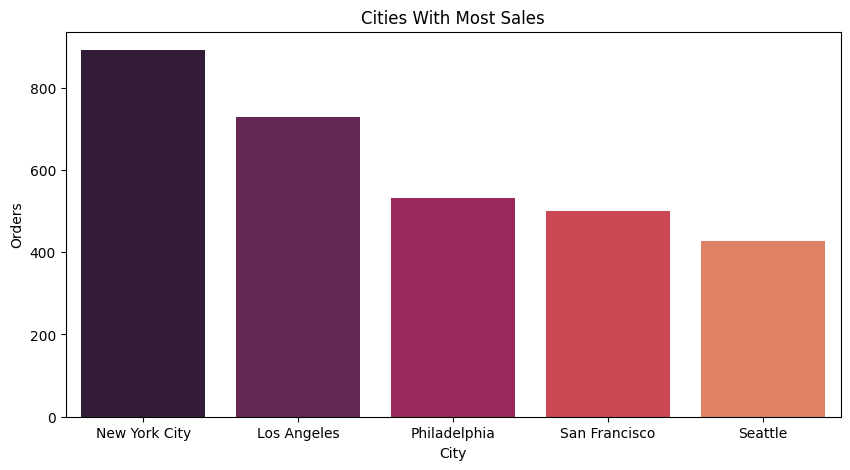

In [5]:
plt.figure(figsize=(10,5))
x = sns.countplot(data=df, x = 'City', 
order = df["City"].value_counts().head(5).index, 
palette = sns.color_palette("rocket"))
plt.title('Cities With Most Sales')
plt.xlabel('City')
plt.ylabel('Orders')

In [6]:
#2) Most Popular Segments
 
seg = pd.DataFrame(df['Segment'].value_counts())
seg.rename(columns={'Segment': 'Count'}, inplace=True)
seg
#Consumers are the most popular segment


,count
Segment,
Consumer,5101
Corporate,2953
Home Office,1746


Text(0, 0.5, 'Orders')

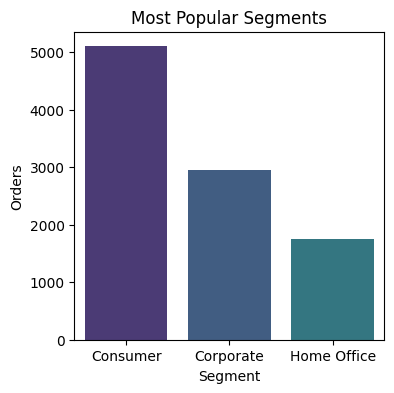

In [7]:
plt.figure(figsize=(4,4))
sns.barplot(seg , x = seg.index , y = 'count',
palette = sns.color_palette("viridis"))
plt.title('Most Popular Segments')
plt.xlabel('Segment')
plt.ylabel('Orders')

In [8]:
#3) Customers with most orders
df['Customer Name'].value_counts().head(5)

Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
Name: count, dtype: int64

Text(0, 0.5, 'Orders')

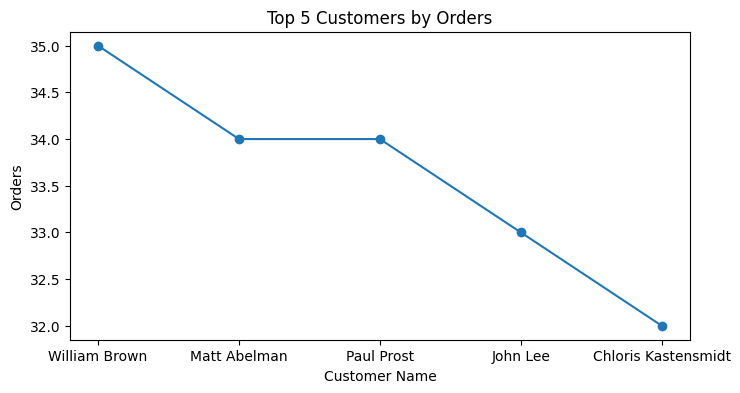

In [9]:
customer_counts = df['Customer Name'].value_counts().head(5)
plt.figure(figsize=(8, 4))
plt.plot(customer_counts.index, customer_counts.values, marker='o', linestyle='-')
plt.title('Top 5 Customers by Orders')
plt.xlabel('Customer Name')
plt.ylabel('Orders')



In [10]:
#4) Most popular modes of shipping
df["Ship Mode"].value_counts()


Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Ship Modes')

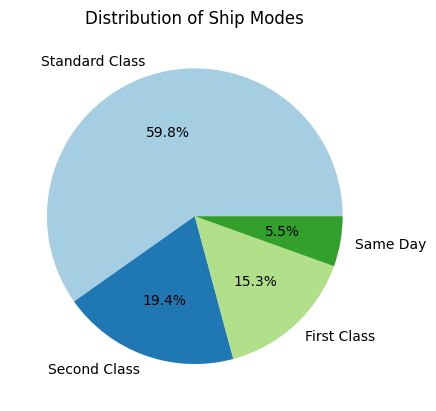

In [11]:
ship_mode = df["Ship Mode"].value_counts()
plt.pie(ship_mode, labels=ship_mode.index, autopct='%1.1f%%', 
colors = sns.color_palette("Paired"))
plt.title("Distribution of Ship Modes")

In [12]:
#5) Highest selling categories and sub-categories
Sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Sort Values by Sub-Category
Sales_by_category = Sales_by_category.sort_values(by='Sales', ascending=False)
print(Sales_by_category.head().reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


Text(0.5, 1.0, 'Sales by category')

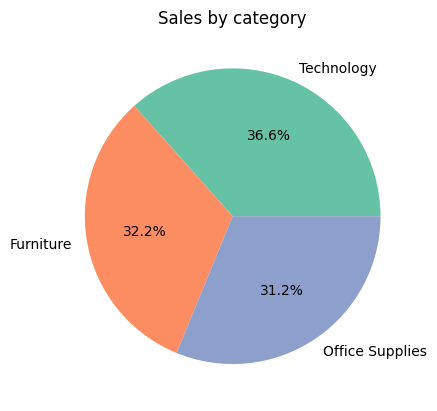

In [13]:
plt.pie(Sales_by_category['Sales'], labels=Sales_by_category['Category'], autopct='%1.1f%%',
colors = sns.color_palette("Set2"))
plt.title("Sales by category")

In [14]:
# Group Data by Sub-categories

sub_category_count = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort Values by Sub-Category
top_sub_category_count = sub_category_count.sort_values(by='Sales', ascending=True)

print(top_sub_category_count.head(5).reset_index(drop=True))

  Sub-Category      Sales
0    Fasteners   3001.960
1       Labels  12347.726
2    Envelopes  16128.046
3          Art  26705.410
4     Supplies  46420.308


Text(0, 0.5, 'Top Sub-Categories')

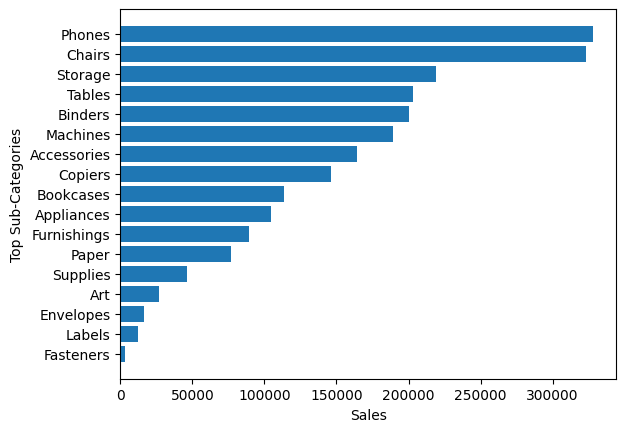

In [15]:
plt.barh(top_sub_category_count['Sub-Category'], top_sub_category_count['Sales'])
plt.xlabel("Sales")
plt.ylabel("Top Sub-Categories")